In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns  
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# df = pd.read_csv("C:/Users/amitk/OneDrive/Desktop/DSBDA MINI PROJECT/electric dataset.csv.csv")

In [ ]:
# df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
49819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# print(df.columns)

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'Hour', 'Day', 'Month'],
      dtype='object')


In [ ]:
# plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

C:\Users\amitk\AppData\Local\Temp\ipykernel_6104\3531929004.py:3: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\amitk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


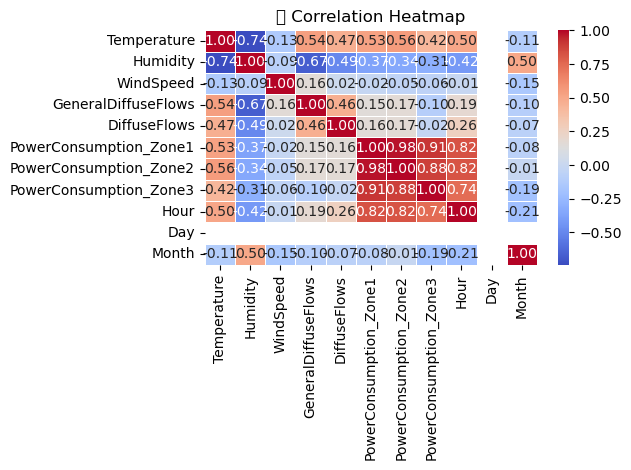

In [ ]:
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("🔗 Correlation Heatmap")
# plt.tight_layout()
# plt.show()

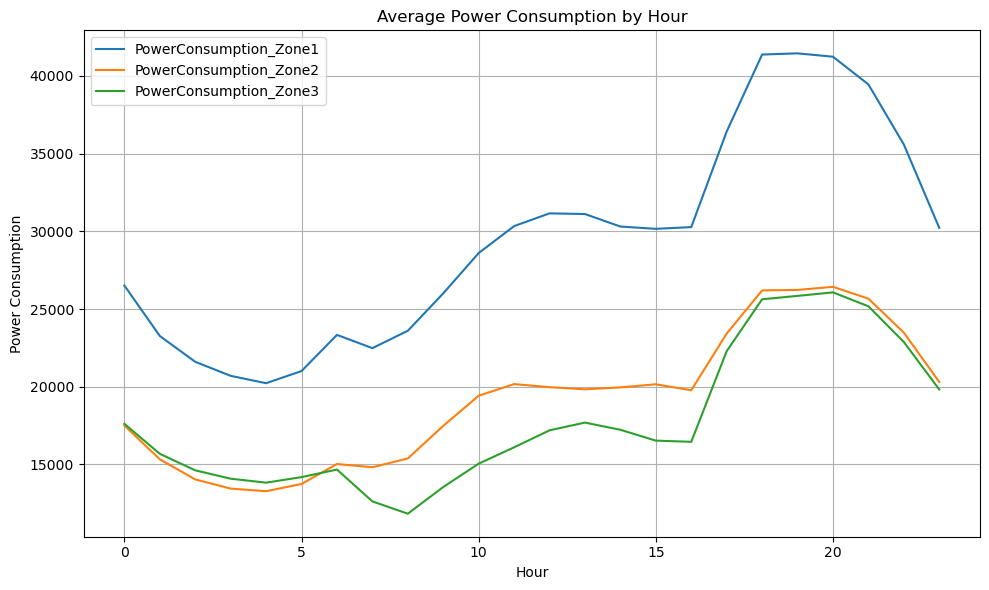

In [ ]:
# hourly_avg = df.groupby('Hour')[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].mean()
# hourly_avg.plot(figsize=(10,6))
# plt.title("Average Power Consumption by Hour")
# plt.xlabel("Hour")
# plt.ylabel("Power Consumption")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# X = df[['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Hour', 'Day', 'Month']]

In [ ]:
# y = df[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']]

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

In [ ]:
# model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

In [ ]:
# print(f"RMSE: {rmse:.2f}")

RMSE: 648.35


In [ ]:
# print(f"R² Score: {r2:.4f}")

R² Score: 0.9841


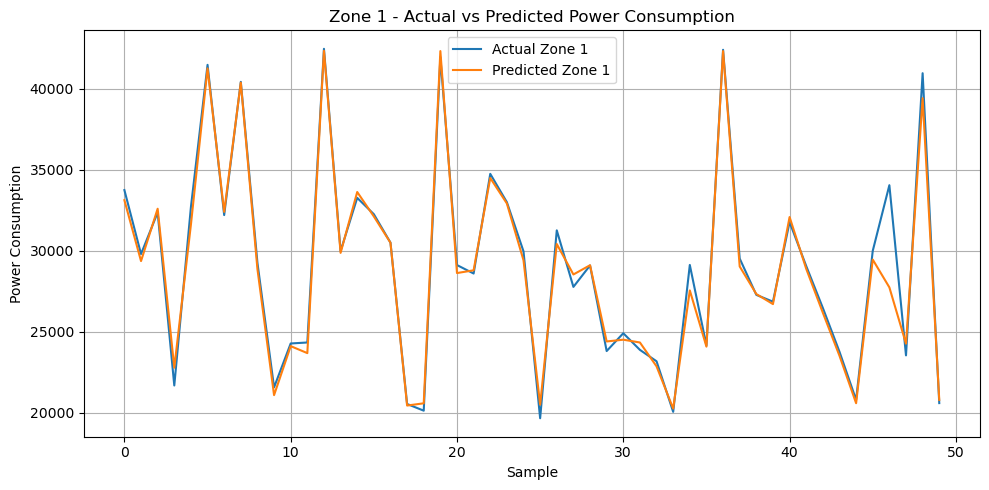

In [ ]:
# plt.figure(figsize=(10, 5))
# plt.plot(y_test.values[:50, 0], label='Actual Zone 1')
# plt.plot(y_pred[:50, 0], label='Predicted Zone 1')
# plt.legend()
# plt.title("Zone 1 - Actual vs Predicted Power Consumption")
# plt.xlabel("Sample")
# plt.ylabel("Power Consumption")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import joblib

# Load dataset
df = pd.read_csv("electric dataset.csv")

# Print columns
print("Columns in dataset:", df.columns)

# Extract Hour, Day, Month from 'Datetime'
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    df['Hour'] = df['Datetime'].dt.hour
    df['Day'] = df['Datetime'].dt.day
    df['Month'] = df['Datetime'].dt.month
else:
    print("❌ Missing 'Datetime' column.")
    exit(1)

# Define features and targets
features = ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows', 'Hour', 'Day', 'Month']
target = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Check all columns exist
missing_cols = [col for col in features + target if col not in df.columns]
if missing_cols:
    print(f"❌ Missing column(s): {missing_cols}")
    exit(1)

# Drop rows with NaN in features or targets
initial_rows = len(df)
df.dropna(subset=features + target, inplace=True)
dropped_rows = initial_rows - len(df)
if dropped_rows > 0:
    print(f"⚠️ Dropped {dropped_rows} rows due to missing values.")

# Prepare data
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'model.pkl')
print("✅ Model trained and saved as model.pkl")
